In [57]:
from google.colab import files

upload = files.upload()

Saving pesticides.csv to pesticides (1).csv
Saving rainfall.csv to rainfall (1).csv
Saving temp.csv to temp (1).csv
Saving yield.csv to yield (1).csv


In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [64]:
df_yield = pd.read_csv('yield.csv')
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [65]:
df_yield

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


Looking at the columns in the csv, we can rename **Value** to **hg/ha_yield** to make it easier to recognise that this is our crops yields production value. In addition to removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [66]:
# rename columns.
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [67]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [68]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


### Climate Data : Rainfall
The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.


Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank.

In [69]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [70]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})
df_rain = df_rain.rename(index=str, columns={"average_rain_fall_mm_per_year": 'Average Rainfall'})

In [71]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              6727 non-null   object
 1   Year              6727 non-null   int64 
 2   Average Rainfall  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


convert average_rain_fall_mm_per_year from object to float

In [72]:
df_rain['Average Rainfall'] = pd.to_numeric(df_rain['Average Rainfall'],errors = 'coerce')

In [73]:
df_rain = df_rain.dropna()

In [74]:
df_rain.describe()

,Year,Average Rainfall
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


Merge Yield Dataframe with rain Dataframe by year and area columns

In [75]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [76]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,Average Rainfall
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [77]:
yield_df.describe()

,Year,hg/ha_yield,Average Rainfall
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


### Pesticides Data:
Pesticides used for each item and country was also collected from FAO database.  

In [78]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [79]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [80]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [81]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [82]:
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [83]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,Average Rainfall,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


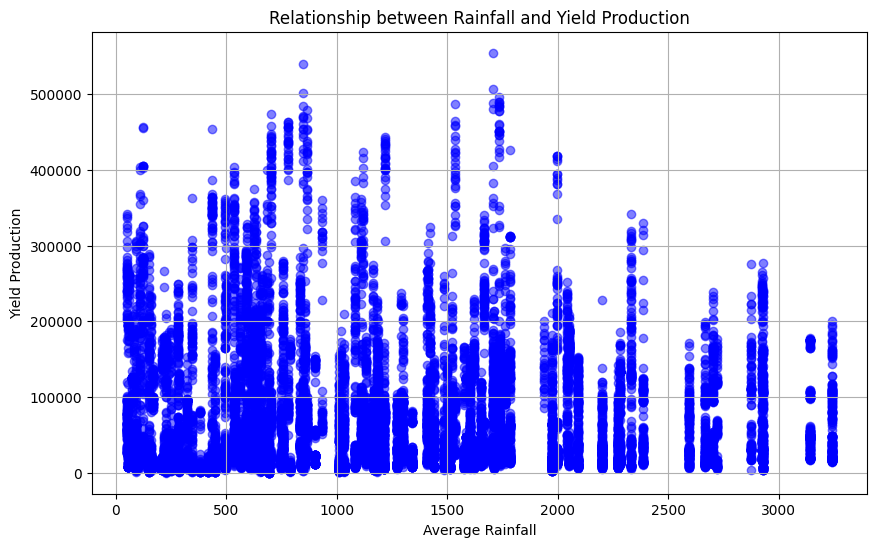

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(yield_df['Average Rainfall'], yield_df['hg/ha_yield'], c='blue', alpha=0.5)
plt.title('Relationship between Rainfall and Yield Production')
plt.xlabel('Average Rainfall')
plt.ylabel('Yield Production')
plt.grid(True)
plt.show()

In [85]:
df_temp=  pd.read_csv('temp.csv')
df_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [86]:
df_temp = df_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
df_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [87]:
df_temp = df_temp.dropna()

In [88]:
yield_df = pd.merge(yield_df,df_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,Average Rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [89]:
yield_df.shape

(28242, 7)

In [90]:
yield_df.isnull().sum()

Area                 0
Item                 0
Year                 0
hg/ha_yield          0
Average Rainfall     0
pesticides_tonnes    0
avg_temp             0
dtype: int64

**yield_df** is the final obtained dataframe;

In [91]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,Average Rainfall,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [92]:
yield_df.describe()

,Year,hg/ha_yield,Average Rainfall,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


It can be noticed the high variance in the values for each columns, later on I'll account for that will scaling.

In [93]:
yield_df['Area'].nunique()

101

In [94]:
yield_df = yield_df.rename(index=str, columns={"Value": "hg/ha_yield"})

In [95]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

In [96]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [97]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

''

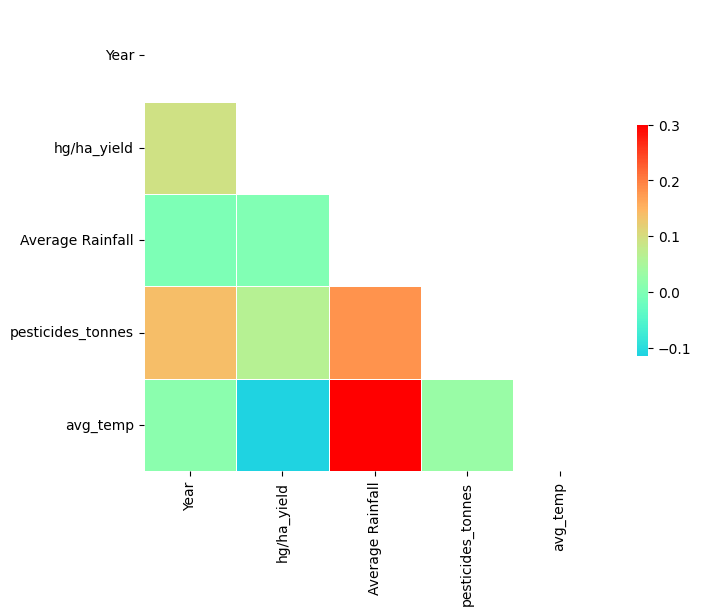

In [98]:
correlation_data = yield_df.select_dtypes(include=[np.number]).corr()

# Creating a mask
mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plotting
f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(correlation_data, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5,cmap="rainbow", cbar_kws={"shrink": .5});
''

In [99]:
yield_df.sample(5)

,Area,Item,Year,hg/ha_yield,Average Rainfall,pesticides_tonnes,avg_temp
1949,Azerbaijan,Potatoes,2007,154570,447.0,148.68,12.75
1070,Australia,Potatoes,1996,312853,534.0,31185.00,19.13
3129,Brazil,Yams,1995,91587,1761.0,92967.22,27.52
15639,Iraq,Soybeans,2012,8334,216.0,1979.27,20.70
26313,Thailand,Sorghum,1992,14440,1622.0,18849.00,27.55


In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
encoded_yield_df = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=encoded_yield_df.loc[:, encoded_yield_df.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,Average Rainfall,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [102]:
features = features.drop(['Year'], axis=1)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [104]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

In [105]:
encoded_yield_df = encoded_yield_df.drop(['Year'], axis=1)

In [106]:
test_df=pd.DataFrame(test_data,columns=encoded_yield_df.loc[:, encoded_yield_df.columns != 'hg/ha_yield'].columns)

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


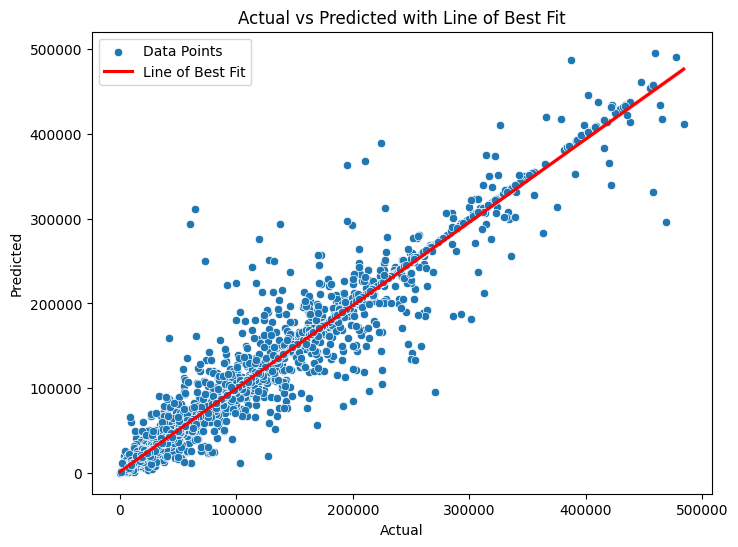

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_df["yield_actual"], y=test_df["yield_predicted"],cmap="rainbow")
sns.regplot(x=test_df["yield_actual"], y=test_df["yield_predicted"], scatter=False, color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted with Line of Best Fit")
plt.legend(['Data Points','Line of Best Fit'])
plt.show()


In [109]:
r2 = r2_score(test_df["yield_actual"], test_df["yield_predicted"])
print("R-squared:", r2)

R-squared: 0.961127696741854


In [110]:
yield_df.sample(5)


,Area,Item,Year,hg/ha_yield,Average Rainfall,pesticides_tonnes,avg_temp
9879,Guyana,"Rice, paddy",1996,40141,2387.0,289.90,27.11
805,Armenia,Maize,2013,67114,562.0,278.72,11.08
23401,Peru,Wheat,1999,12877,1738.0,4029.00,16.65
7290,Dominican Republic,"Rice, paddy",2002,48593,1410.0,4018.07,27.08
4375,Brazil,Sorghum,2009,23378,1761.0,335742.00,18.84


<ipython-input-126-52301ca66f70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='hg/ha_yield', palette="rainbow", data=top_5_df)


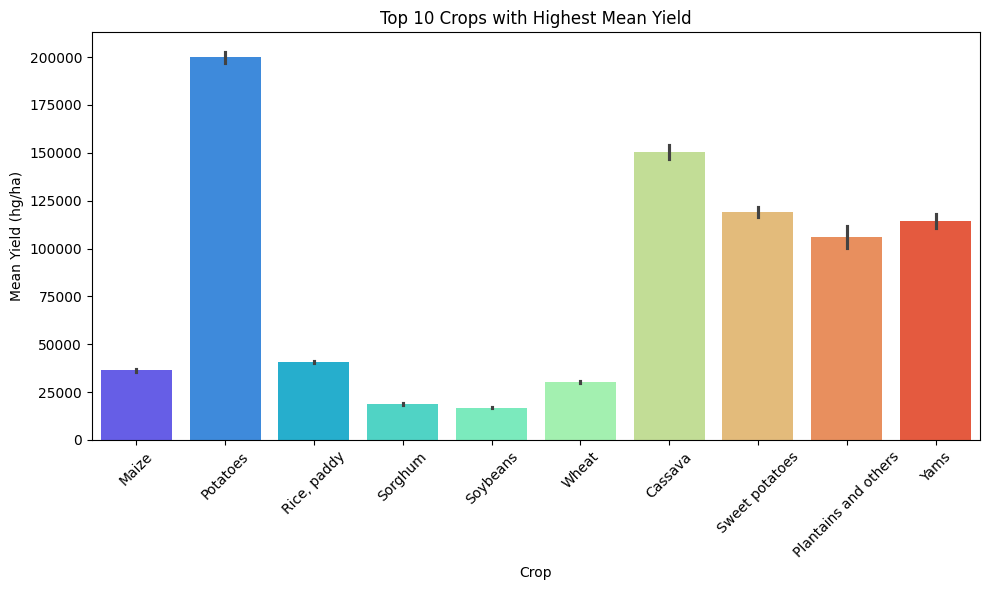

In [126]:
crop_yield_mean = yield_df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False)


top_5_crops = crop_yield_mean.head(10)

# Step 3: Filter the original DataFrame to include only the data for the top 5 crops
top_5_df = yield_df[yield_df['Item'].isin(top_5_crops.index)]

# Step 4: Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Item', y='hg/ha_yield', palette="rainbow", data=top_5_df)
plt.title('Top 10 Crops with Highest Mean Yield')
plt.xlabel('Crop')
plt.ylabel('Mean Yield (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [122]:
yield_df.describe().round(2)

,Year,hg/ha_yield,Average Rainfall,pesticides_tonnes,avg_temp
count,28242.00,28242.00,28242.00,28242.00,28242.00
mean,2001.54,77053.33,1149.06,37076.91,20.54
std,7.05,84956.61,709.81,59958.78,6.31
min,1990.00,50.00,51.00,0.04,1.30
25%,1995.00,19919.25,593.00,1702.00,16.70
50%,2001.00,38295.00,1083.00,17529.44,21.51
75%,2008.00,104676.75,1668.00,48687.88,26.00
max,2013.00,501412.00,3240.00,367778.00,30.65
